# 数据分析

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file_path = 'E:/JDD2018/data/'
flow_train = pd.read_csv(file_path + 'flow_train.csv')
transition_train = pd.read_csv(file_path + 'transition_train.csv')

### 人口流动数据基本情况

In [9]:
print('人口流动数据总样本数:%d'%len(flow_train))
flow_train.head(5)

人口流动数据总样本数:26852


,date_dt,city_code,district_code,dwell,flow_in,flow_out
0,20170601,06d86ef037e4bd311b94467c3320ff38,85792b2278de59316d1158f6a97537ec,118.861740,54.421293,52.089701
1,20170601,5615dc7c1af1f7dabd80bd8b8ecb1ea0,1d86aa481642ba64ef42e2956339bbad,130.333409,235.490857,231.275943
2,20170601,c7537db4101856877ea6381d0174283c,08751b85e3dc67f2e690cf8945a4d85b,98.698267,57.672715,54.252464
3,20170601,5615dc7c1af1f7dabd80bd8b8ecb1ea0,50ec193f67e23ca084bb7af4100c1243,280.984567,571.333345,555.579813
4,20170601,3f7f0ce35d6d0a08377eb2efe2189f4f,dad5b1a26517a039827215846bcaf394,99.126162,72.334678,69.968155


In [18]:
temp = flow_train.groupby('date_dt',as_index = False)
print('数据包含%d天的数据'%len(temp))
flow_train_data_dt = [x for x,_ in temp]
print('时间范围为%d至%d'%(flow_train_data_dt[0],flow_train_data_dt[-1]))

数据包含274天的数据
时间范围为20170601至20180301


数据包含7个城市的数据
所有城市编码为：['06d86ef037e4bd311b94467c3320ff38', '3f7f0ce35d6d0a08377eb2efe2189f4f', '5615dc7c1af1f7dabd80bd8b8ecb1ea0', '58a33c947775af5de36841c9f553317d', 'a20d041605db832309e26c003c626719', 'c7537db4101856877ea6381d0174283c', 'ee2ff207184bf16b4a0aec0f97900c27']


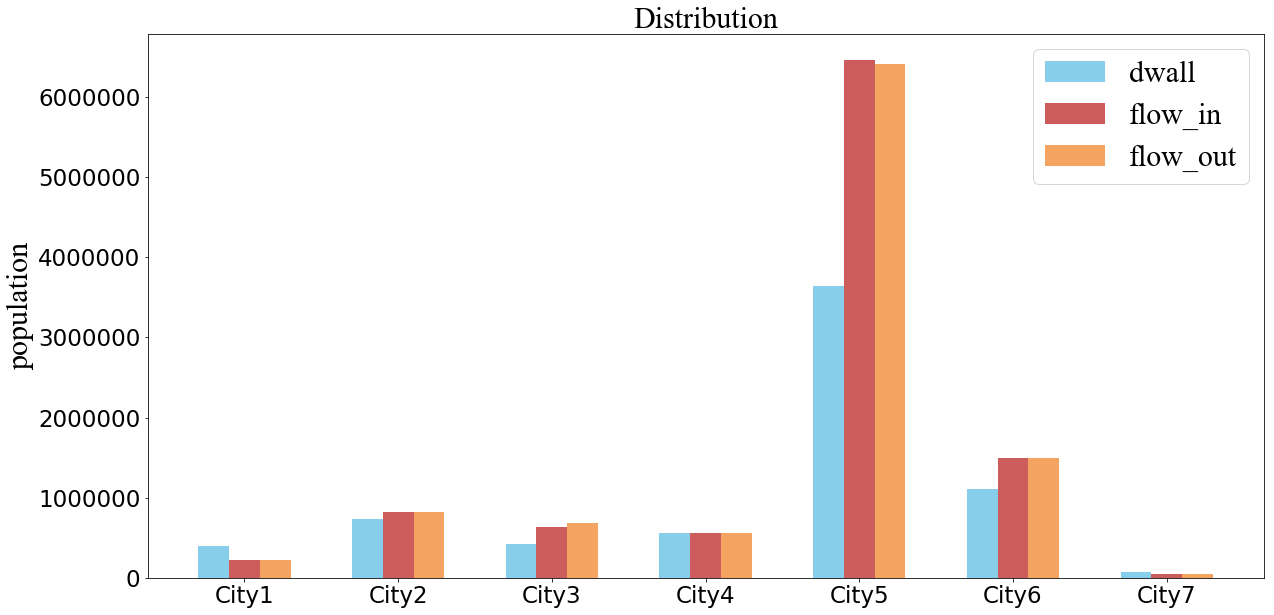

In [81]:
temp = flow_train.groupby('city_code',as_index = False)
print('数据包含%d个城市的数据'%len(temp))
flow_train_city_code = [x for x,_ in temp]
print('所有城市编码为：%s'%flow_train_city_code)

#城市各项人数分布图
temp1 = temp['dwell'].agg({'amount':'sum'})
temp2 = temp['flow_in'].agg({'amount':'sum'})
temp3 = temp['flow_out'].agg({'amount':'sum'})

ind = np.arange(len(flow_train_city_code))*10 #每组的横坐标位置
width = 2 #柱形图宽度
font = {'family': 'Times New Roman',    #字体
        'weight': 'normal',
        'size': 30}

fig,ax = plt.subplots()
fig.set_size_inches(20,10)
plt.tick_params(labelsize = 23)
rects1 = ax.bar(ind - width, temp1['amount'], width, color = 'Skyblue', label = 'dwall')
rects2 = ax.bar(ind, temp2['amount'], width, color = 'IndianRed', label = 'flow_in')
rects3 = ax.bar(ind + width, temp3['amount'], width, color = 'Sandybrown', label = 'flow_out')

#图说明
ax.set_ylabel('population',font)
ax.set_title('Distribution',font)
ax.set_xticks(ind)
ax.set_xticklabels(('City1','City2','City3','City4','City5','City6','City7'))
ax.legend(prop=font)

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')

#autolabel(rects1, "left")
#autolabel(rects2, "center")
#autolabel(rects3, "right")

plt.show()

In [88]:
flow_train_com = flow_train
flow_train_com['address'] = flow_train_com['city_code'] + ':' +flow_train_com['district_code']
flow_train_com = flow_train_com.drop(['city_code','district_code'], axis = 1)

temp = flow_train_com.groupby('address',as_index = False)
print('包含区县共有：%d个地点'%len(temp))

包含区县共有：98个地点


In [92]:
most_popu_city = 'a20d041605db832309e26c003c626719'
flow_train_most_popu_city = flow_train[flow_train['city_code'] == most_popu_city]
temp = flow_train_most_popu_city.groupby('district_code', as_index =False)
print('人口流量最大的城市包含%d个区县'%len(temp))

人口流量最大的城市包含16个区县


### 人口转移数据基本情况

In [90]:
print('人口转移数据总样本数:%d'%len(transition_train))
transition_train.head(5)

人口转移数据总样本数:2480320


,date_dt,o_city_code,o_district_code,d_city_code,d_district_code,cnt
0,20170601,a20d041605db832309e26c003c626719,879c99a1536ce81df8e84c0c9cf6ff68,3f7f0ce35d6d0a08377eb2efe2189f4f,01bb949d16b241654d3be95fa224abc8,0.008733
1,20170601,c7537db4101856877ea6381d0174283c,82271c9f4c9bf3b072ebe43b29d01caf,c7537db4101856877ea6381d0174283c,4a2ee3a671acbb271743ca0abbcadc70,2.066705
2,20170601,5615dc7c1af1f7dabd80bd8b8ecb1ea0,2d9ca395c9405028ca5d6635253d7166,a20d041605db832309e26c003c626719,01c2fa70527b0c72808f3bc27eaad4c9,0.177562
3,20170601,a20d041605db832309e26c003c626719,cc000ec2dd2b1c6571e74cecc641656e,58a33c947775af5de36841c9f553317d,0b28636d08bff292de12f663d522c55f,0.113523
4,20170601,c7537db4101856877ea6381d0174283c,3f92d69b5335d09f3365beaeec3da4b8,58a33c947775af5de36841c9f553317d,0b28636d08bff292de12f663d522c55f,0.058217


In [91]:
temp = transition_train.groupby('date_dt',as_index = False)
print('数据包含%d天的数据'%len(temp))
transition_train_data_dt = [x for x,_ in temp]
print('时间范围为%d至%d'%(transition_train_data_dt[0],transition_train_data_dt[-1]))

数据包含274天的数据
时间范围为20170601至20180301
